In [1]:

!pip install -q numpy==1.19.0
!pip install -q matplotlib==3.3.0
!pip install seaborn==0.11.0
!pip install -q pandas==1.1.0

In [2]:
# Импорт необходимых модулей 
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Настройки для визуализации
# Если используется темная тема - лучше текст сделать белым
TEXT_COLOR = 'black'

matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['axes.labelcolor'] = TEXT_COLOR
matplotlib.rcParams['xtick.color'] = TEXT_COLOR
matplotlib.rcParams['ytick.color'] = TEXT_COLOR

# Зафиксируем состояние случайных чисел
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

#Базовая подготовка данных

Загрузка данных

In [3]:
from sklearn.datasets import load_boston
boston_data = load_boston()
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Pазмерности матрицы признаков и вектора предсказываемых значений

In [4]:
feature_data = boston_data['data']
feature_names = boston_data['feature_names']
target_data = boston_data['target']

print(type(feature_data))
print(type(target_data))

print(feature_data.shape)
print(target_data.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(506, 13)
(506,)


Перевод в формат фреймворка pandas

In [5]:
df = pd.DataFrame(feature_data, columns=boston_data['feature_names'])
df['PRICE'] = target_data
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


 Базовая информация по данным

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Проверка наличия дубликатов

In [8]:
dup_mask = df.duplicated()
dup_mask.sum()

0

Проверка и определение типов признаков

In [9]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

Изменение типа

In [10]:
df['CHAS'] = df['CHAS'].astype(int).astype(dtype='category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    float64 
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  PRICE    506 non-null    float64 
dtypes: category(1), float64(13)
memory usage: 52.1 KB


# Создание baseline модели линейной регрессии


Разделение данных

In [11]:
from sklearn.model_selection import train_test_split

# 70% - для обучения, 30% - для тестов
TRAIN_RATIO = 0.7

# X - DataFrame только с признаками (для примера берем все признаки)
X = df[feature_names]
# y - истинные значения (разметка)
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(
    # Передаются наборы, которые будут разделены в соответсвии с параметрами
    X, y, 
    # Задается размер обучающей выборки
    train_size=TRAIN_RATIO, 
    # Фиксируется состояние генератора случайных чисел 
    #   для сохранения повторяемости
    random_state=RANDOM_STATE
)

Создание модели линейной регрессии и ее обучение с помощью метода fit()

In [12]:
from sklearn.linear_model import LinearRegression

# Создаем объект
reg = LinearRegression()
# Обучаем на выборке для обучения
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Bеса и смещение

In [13]:
# Для отображения весов создадим функцию
def show_linear_model_weights(model, feature_names=None):
    '''
    Отображение весов
    Аргументы:
        model - модель линейной регрессии
        feature_names - (опционально) если передано, отображение весов вместе с именами признаков
    '''
    print('\n----- Weights -----')
    weights = model.coef_
    bias = model.intercept_
    if feature_names is None:  
        print(f'Weights: {weights}')
    else:
        # Функция zip() делает из двух списков один список пар значений
        pairs = zip(feature_names, weights)
        for pair in pairs:
            print(f'{pair[0]} | {pair[1]}')

    print(f'Bias: {bias}')

show_linear_model_weights(reg, X_train.columns)


----- Weights -----
CRIM | -0.1334701028529461
ZN | 0.03580891359323195
INDUS | 0.04952264522005543
CHAS | 3.119835116285394
NOX | -15.417060895306689
RM | 4.057199231645403
AGE | -0.010820835184926221
DIS | -1.3859982431608788
RAD | 0.24272733982224926
TAX | -0.00870223436566183
PTRATIO | -0.9106852081102881
B | 0.011794115892575632
LSTAT | -0.5471133128239569
Bias: 31.631084035691632


График предсказаний

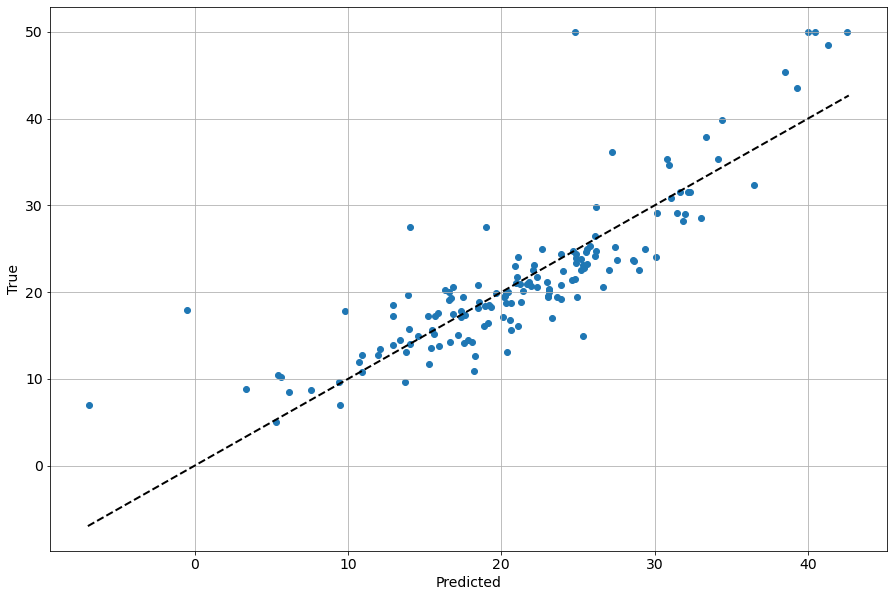

In [14]:
def draw_predictions_plot(y_pred, y_true):
    plt.scatter(y_pred, y_true)
    line_pnts = np.linspace(np.amin(y_pred)-0.1, np.amax(y_pred)+0.1, 1000)
    plt.plot(line_pnts, line_pnts, 'k--', lw=2)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.grid()

y_pred = reg.predict(X_test)
draw_predictions_plot(y_pred, y_test)

Оценка численных характеристик

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# При повторении кода лучшей практикой является создание функции 
#   для исключения дублирований
# Дублирование кода -> ошибки
def evaluate_regressor(reg, X, y, mode):
    y_pred = reg.predict(X)
    r2_score_value = r2_score(y, y_pred)
    rmse_score = np.sqrt(mean_squared_error(y, y_pred))
    mae_score = mean_absolute_error(y, y_pred)

    print(f'\n----- Evaluation for {mode} -----')
    print(f'  R2: {r2_score_value}')
    print(f'  RMSE: {rmse_score}')
    print(f'  MAE: {mae_score}')

evaluate_regressor(reg, X_train, y_train, 'train')
evaluate_regressor(reg, X_test, y_test, 'test')


----- Evaluation for train -----
  R2: 0.7434997532004697
  RMSE: 4.748208239685937
  MAE: 3.356826782168207

----- Evaluation for test -----
  R2: 0.7112260057484874
  RMSE: 4.638689926172867
  MAE: 3.1627098714574537


#Расширенный анализ данных

##Корреляционный анализ

<AxesSubplot:>

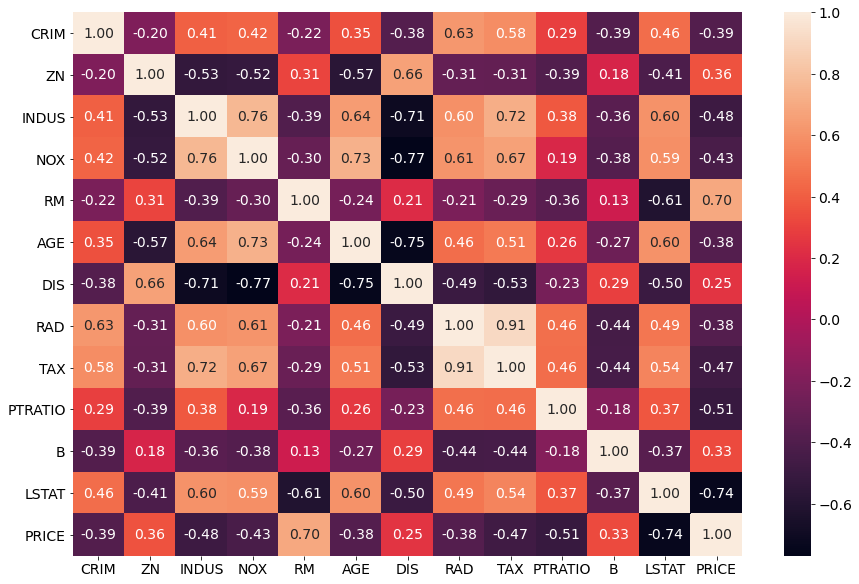

In [16]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT','PRICE']

correlation_mtrx = df[features].corr()
correlation_mtrx
sns.heatmap(correlation_mtrx, annot=True, fmt='.2f')

Тепловая карта показывает взаимосвязь переменных с целевой функцией цены.

##Анализ распределений

<Figure size 720x504 with 0 Axes>

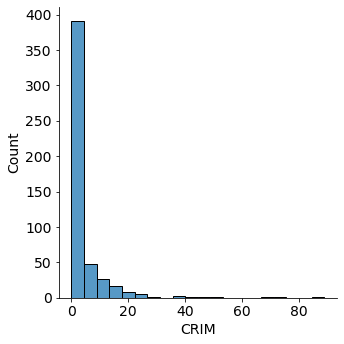

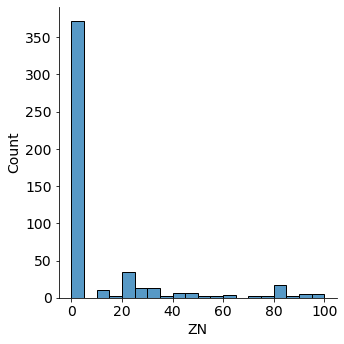

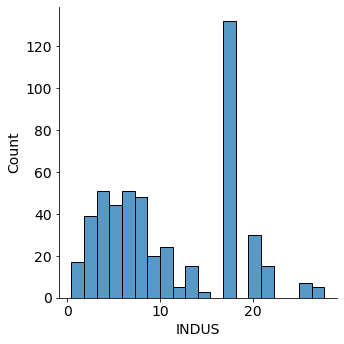

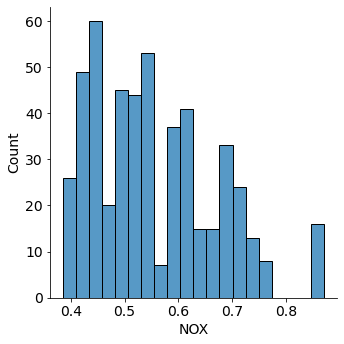

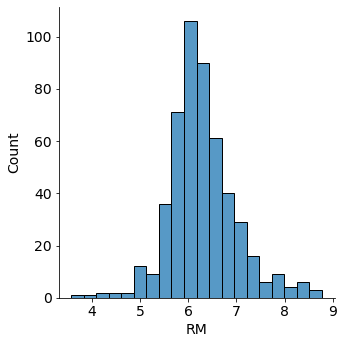

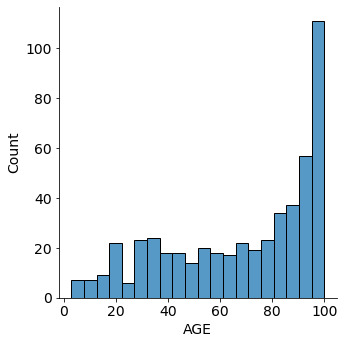

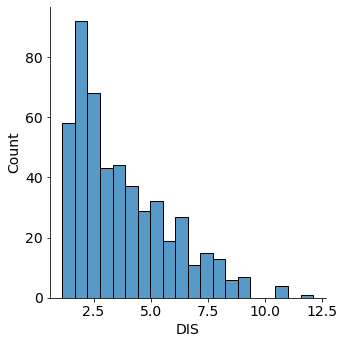

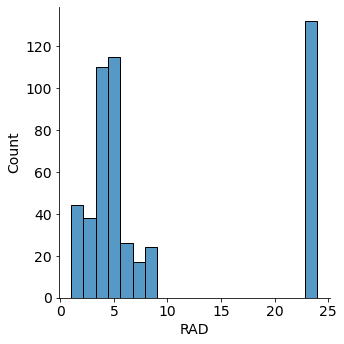

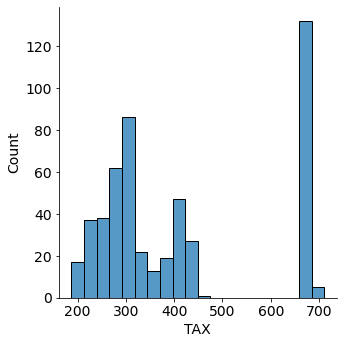

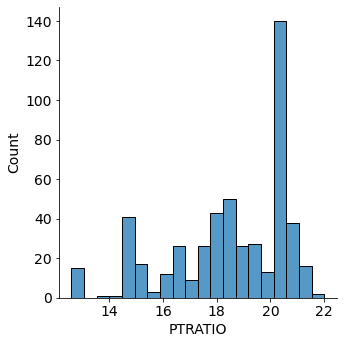

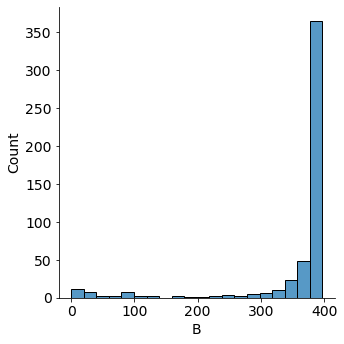

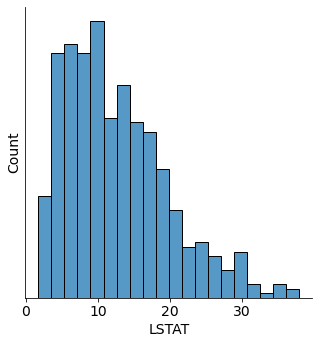

In [17]:
plt.figure(figsize=[10, 7])
l=[0,1,2,4,5,6,7,8,9,10,11,12]
for i in l:
  sns.displot(data=df[feature_names[i]],bins=20)

# Отключение меток на оси Y
plt.yticks([])
plt.show()

Характер зависимости целевой переменной от каждого признака

<Figure size 720x504 with 0 Axes>

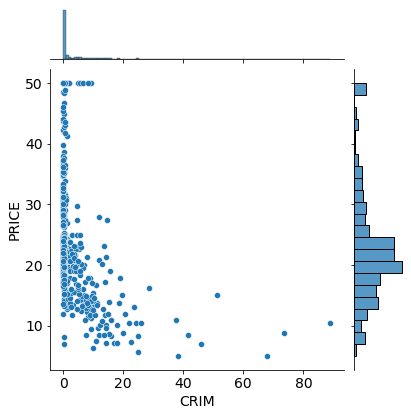

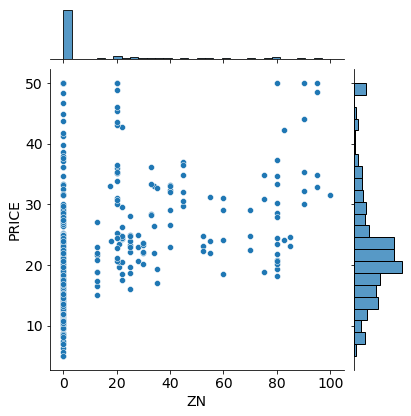

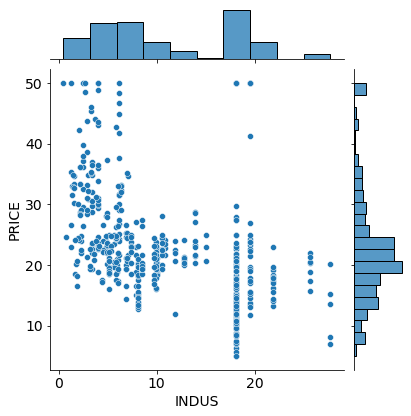

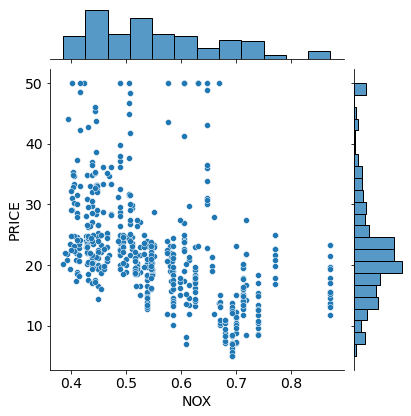

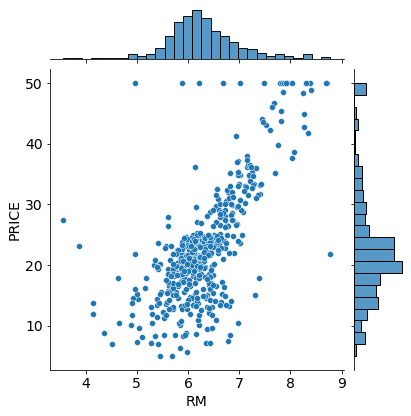

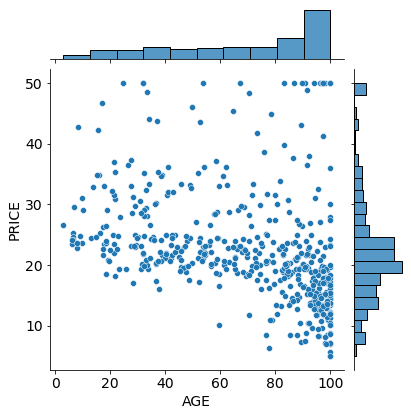

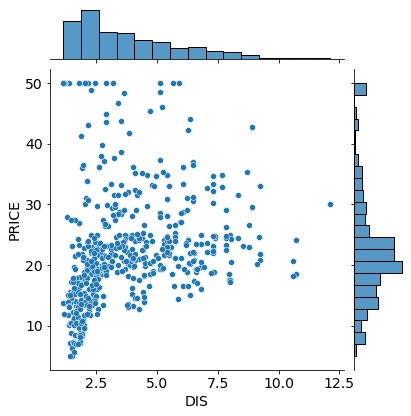

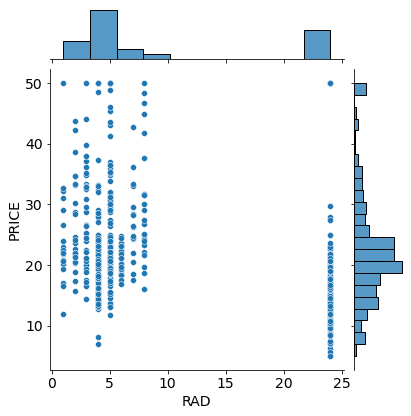

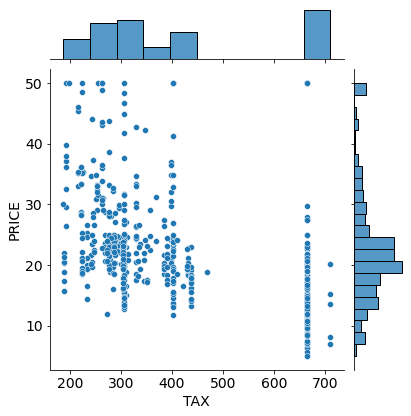

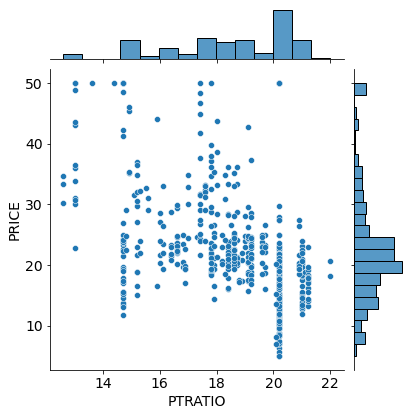

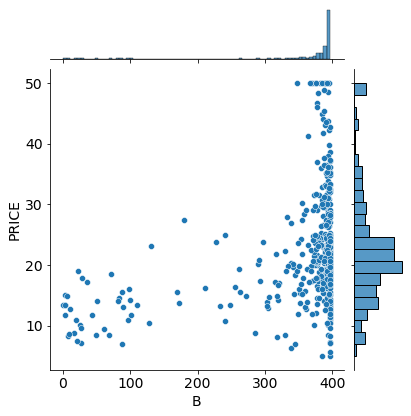

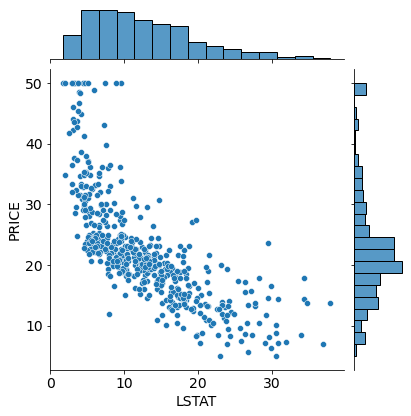

In [18]:
plt.figure(figsize=[10, 7])
l=[0,1,2,4,5,6,7,8,9,10,11,12]
for i in l:
  #sns.displot(data=df[feature_names[i]],bins=20)
  sns.jointplot(x=feature_names[i], y="PRICE", data=df)

Некоторая линейная зависимость наблюдается между ценой и  RM, LSTAT

#Нормализация данных

Выполним стандартизацию данных и получим распределение для стандаризированных и нестандартризированных данных

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


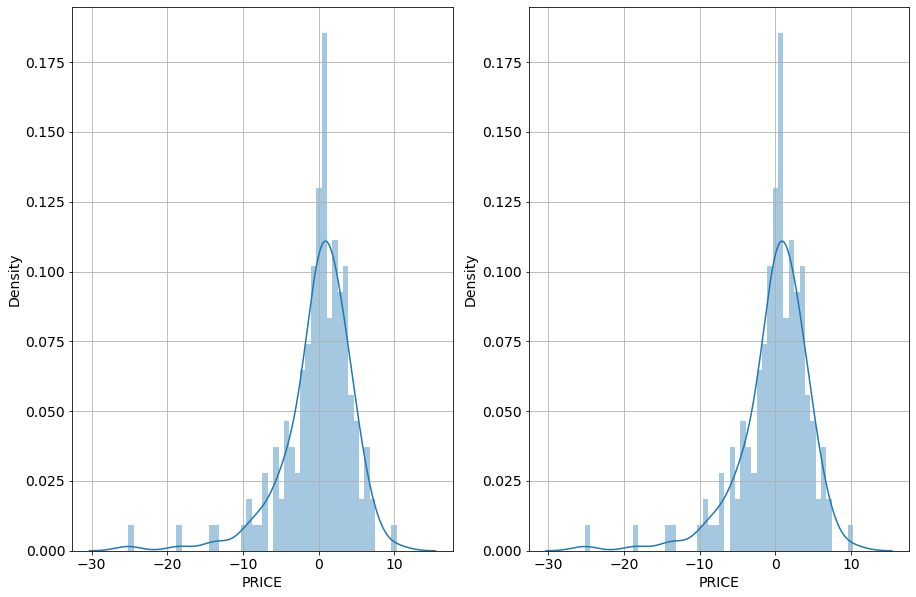

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
reg = LinearRegression()

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Обучаем на выборке для обучения
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
y_residuals = y_pred-y_test
plt.subplot(121)
sns.distplot(y_residuals, bins=50)
plt.grid()

reg.fit(X_train, y_train)
y_pred1 = reg.predict(X_test)
y_residuals1 = y_pred1-y_test
plt.subplot(122)
sns.distplot(y_residuals1, bins=50)
plt.grid()


Значения весов до стандартизации

In [20]:
reg.fit(X_train, y_train)
show_linear_model_weights(reg, X_train.columns)
evaluate_regressor(reg, X_train, y_train, 'train')
evaluate_regressor(reg, X_test, y_test, 'test')


----- Weights -----
CRIM | -0.1334701028529461
ZN | 0.03580891359323195
INDUS | 0.04952264522005543
CHAS | 3.119835116285394
NOX | -15.417060895306689
RM | 4.057199231645403
AGE | -0.010820835184926221
DIS | -1.3859982431608788
RAD | 0.24272733982224926
TAX | -0.00870223436566183
PTRATIO | -0.9106852081102881
B | 0.011794115892575632
LSTAT | -0.5471133128239569
Bias: 31.631084035691632

----- Evaluation for train -----
  R2: 0.7434997532004697
  RMSE: 4.748208239685937
  MAE: 3.356826782168207

----- Evaluation for test -----
  R2: 0.7112260057484874
  RMSE: 4.638689926172867
  MAE: 3.1627098714574537


После стандартизации

In [21]:
reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')


----- Weights -----
CRIM | -1.108346015417754
ZN | 0.8084399775400835
INDUS | 0.3431346557047933
CHAS | 0.8138642573885838
NOX | -1.7980429490588932
RM | 2.9138579955497654
AGE | -0.2989391755039209
DIS | -2.9425114769806915
RAD | 2.094193030043761
TAX | -1.447067312811984
PTRATIO | -2.05232232408682
B | 1.0237518746405991
LSTAT | -3.8857900211493894
Bias: 23.01581920903955

----- Evaluation for train -----
  R2: 0.7434997532004697
  RMSE: 4.748208239685937
  MAE: 3.3568267821682065

----- Evaluation for test -----
  R2: 0.7112260057484932
  RMSE: 4.638689926172821
  MAE: 3.162709871457406


Веса стали более равномерными, одного порядка.

##Трансформер sklearn.preprocessing.MinMaxScaler 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


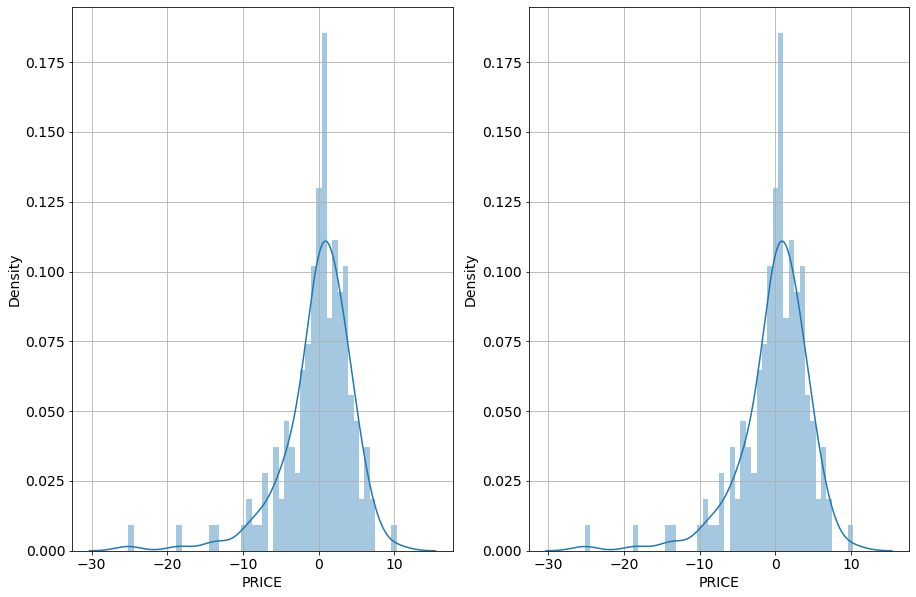

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
reg = LinearRegression()

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Обучаем на выборке для обучения
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
y_residuals = y_pred-y_test
plt.subplot(121)
sns.distplot(y_residuals, bins=50)
plt.grid()

reg.fit(X_train, y_train)
y_pred1 = reg.predict(X_test)
y_residuals1 = y_pred1-y_test
plt.subplot(122)
sns.distplot(y_residuals1, bins=50)
plt.grid()

Без обработки

In [23]:
reg.fit(X_train, y_train)
show_linear_model_weights(reg, X_train.columns)
evaluate_regressor(reg, X_train, y_train, 'train')
evaluate_regressor(reg, X_test, y_test, 'test')


----- Weights -----
CRIM | -0.1334701028529461
ZN | 0.03580891359323195
INDUS | 0.04952264522005543
CHAS | 3.119835116285394
NOX | -15.417060895306689
RM | 4.057199231645403
AGE | -0.010820835184926221
DIS | -1.3859982431608788
RAD | 0.24272733982224926
TAX | -0.00870223436566183
PTRATIO | -0.9106852081102881
B | 0.011794115892575632
LSTAT | -0.5471133128239569
Bias: 31.631084035691632

----- Evaluation for train -----
  R2: 0.7434997532004697
  RMSE: 4.748208239685937
  MAE: 3.356826782168207

----- Evaluation for test -----
  R2: 0.7112260057484874
  RMSE: 4.638689926172867
  MAE: 3.1627098714574537


После обработки

In [24]:
reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')


----- Weights -----
CRIM | -11.874453326332448
ZN | 3.4018467913571957
INDUS | 1.3138357776880198
CHAS | 3.1198351162853952
NOX | -7.492691595119078
RM | 19.949248622000347
AGE | -1.0507030964564752
DIS | -15.24168408021582
RAD | 5.5827288159117545
TAX | -4.559970807607127
PTRATIO | -8.560440956236727
B | 4.677310480676527
LSTAT | -19.82738645674022
Bias: 26.028229324073685

----- Evaluation for train -----
  R2: 0.7434997532004697
  RMSE: 4.748208239685937
  MAE: 3.3568267821682047

----- Evaluation for test -----
  R2: 0.7112260057484927
  RMSE: 4.638689926172824
  MAE: 3.1627098714574067


##Выводы

Результаты отличаются только в значениях весов, но численные характеристики равны.

#Выравнивание распределений

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


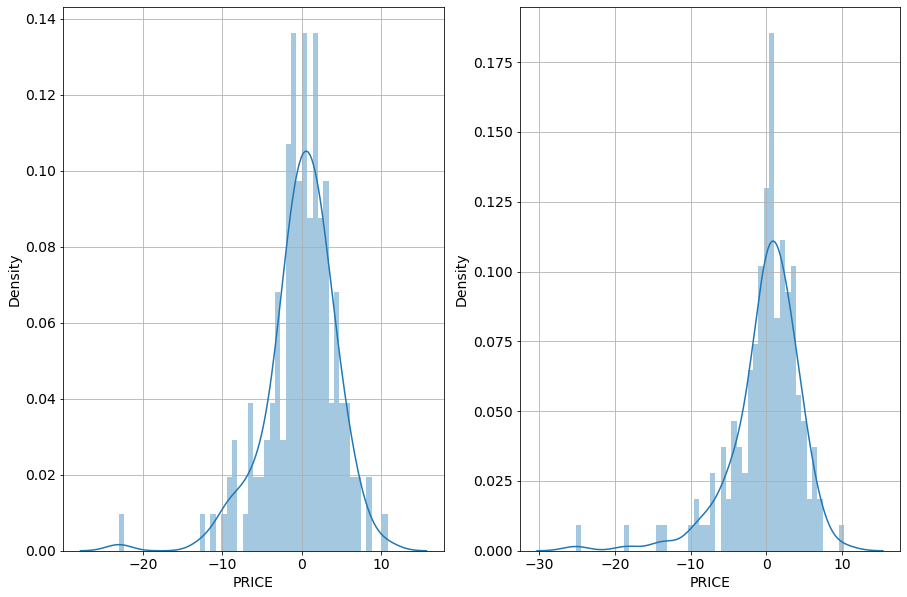

In [25]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer()
reg = LinearRegression()

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Обучаем на выборке для обучения
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
y_residuals = y_pred-y_test
plt.subplot(121)
sns.distplot(y_residuals, bins=50)
plt.grid()

reg.fit(X_train, y_train)
y_pred1 = reg.predict(X_test)
y_residuals1 = y_pred1-y_test
plt.subplot(122)
sns.distplot(y_residuals1, bins=50)
plt.grid()

Без обработки

In [26]:
reg.fit(X_train, y_train)
show_linear_model_weights(reg, X_train.columns)
evaluate_regressor(reg, X_train, y_train, 'train')
evaluate_regressor(reg, X_test, y_test, 'test')


----- Weights -----
CRIM | -0.1334701028529461
ZN | 0.03580891359323195
INDUS | 0.04952264522005543
CHAS | 3.119835116285394
NOX | -15.417060895306689
RM | 4.057199231645403
AGE | -0.010820835184926221
DIS | -1.3859982431608788
RAD | 0.24272733982224926
TAX | -0.00870223436566183
PTRATIO | -0.9106852081102881
B | 0.011794115892575632
LSTAT | -0.5471133128239569
Bias: 31.631084035691632

----- Evaluation for train -----
  R2: 0.7434997532004697
  RMSE: 4.748208239685937
  MAE: 3.356826782168207

----- Evaluation for test -----
  R2: 0.7112260057484874
  RMSE: 4.638689926172867
  MAE: 3.1627098714574537


После обработки

In [27]:
reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')


----- Weights -----
CRIM | -0.13156466464394423
ZN | 0.19951252047411283
INDUS | -0.661968941043374
CHAS | 0.8070988287388107
NOX | -1.593975913739194
RM | 1.953238668377283
AGE | 0.14000510013869283
DIS | -3.2702370734918667
RAD | 0.3842721775169
TAX | 6.661338147750939e-15
PTRATIO | -1.6118671671696452
B | 0.5688864225523941
LSTAT | -5.812179493282584
Bias: 23.01581920903956

----- Evaluation for train -----
  R2: 0.7671674226821155
  RMSE: 4.523845209628152
  MAE: 3.3452541600761636

----- Evaluation for test -----
  R2: 0.7412232713454906
  RMSE: 4.391156466464553
  MAE: 3.1620670158148196


Показатель R2 улучшился.

QuantileTransformer, нормальное распределение

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (354). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


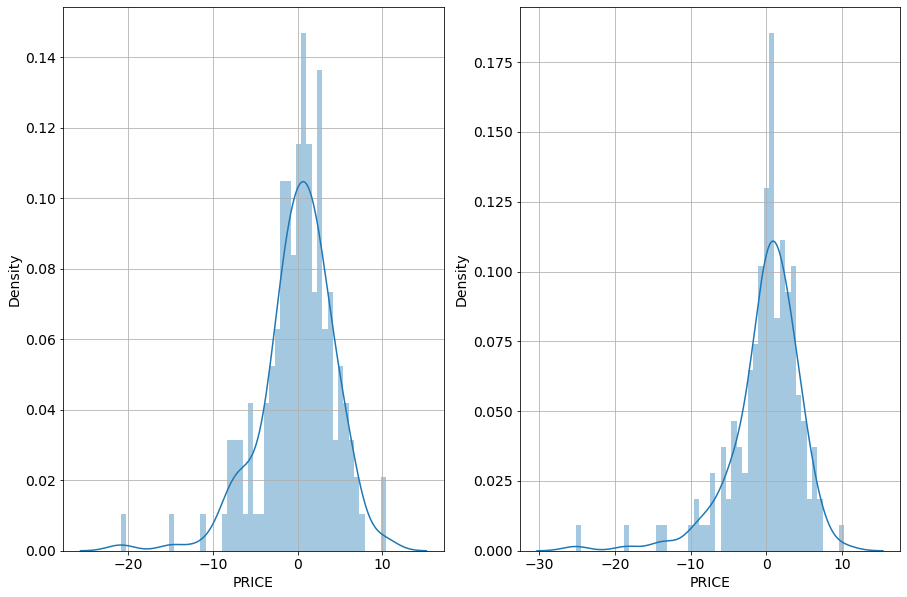

In [28]:
from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer(output_distribution='normal')
reg = LinearRegression()

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Обучаем на выборке для обучения
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
y_residuals = y_pred-y_test
plt.subplot(121)
sns.distplot(y_residuals, bins=50)
plt.grid()

reg.fit(X_train, y_train)
y_pred1 = reg.predict(X_test)
y_residuals1 = y_pred1-y_test
plt.subplot(122)
sns.distplot(y_residuals1, bins=50)
plt.grid()

Без обработки

In [29]:
reg.fit(X_train, y_train)
show_linear_model_weights(reg, X_train.columns)
evaluate_regressor(reg, X_train, y_train, 'train')
evaluate_regressor(reg, X_test, y_test, 'test')


----- Weights -----
CRIM | -0.1334701028529461
ZN | 0.03580891359323195
INDUS | 0.04952264522005543
CHAS | 3.119835116285394
NOX | -15.417060895306689
RM | 4.057199231645403
AGE | -0.010820835184926221
DIS | -1.3859982431608788
RAD | 0.24272733982224926
TAX | -0.00870223436566183
PTRATIO | -0.9106852081102881
B | 0.011794115892575632
LSTAT | -0.5471133128239569
Bias: 31.631084035691632

----- Evaluation for train -----
  R2: 0.7434997532004697
  RMSE: 4.748208239685937
  MAE: 3.356826782168207

----- Evaluation for test -----
  R2: 0.7112260057484874
  RMSE: 4.638689926172867
  MAE: 3.1627098714574537


После обработки

In [30]:
reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')


----- Weights -----
CRIM | -0.6436215551896776
ZN | 0.2136504931088371
INDUS | -0.17880257287476875
CHAS | 0.26018524120763875
NOX | -1.0316416211746446
RM | 1.4017566758007836
AGE | -0.02195341592461203
DIS | -3.3851448585615316
RAD | 0.1010514822287012
TAX | -1.157250252265722
PTRATIO | -1.3505805423381212
B | -0.10849526852504174
LSTAT | -5.5311442521125285
Bias: 24.968537558402915

----- Evaluation for train -----
  R2: 0.7554172540431211
  RMSE: 4.636590829916763
  MAE: 3.4594000699690453

----- Evaluation for test -----
  R2: 0.7464716005585341
  RMSE: 4.346399182858186
  MAE: 3.1830447298707427


Показатель R2 улучшился.

#Исключение выбросов на уровне PRICE == 50 и сравнение результатов.

Требуется удалить записи в которых значение цены больше 50

In [31]:
m= df['PRICE'] >= 50
df1=df
a1=df1.loc[lambda df1: m,['PRICE']].index
a2=df1.drop(index=a1)
print(a2)


        CRIM    ZN  INDUS CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
0    0.00632  18.0   2.31    0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1    0.02731   0.0   7.07    0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2    0.02729   0.0   7.07    0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3    0.03237   0.0   2.18    0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4    0.06905   0.0   2.18    0  0.458  ...  222.0     18.7  396.90   5.33   36.2
..       ...   ...    ...  ...    ...  ...    ...      ...     ...    ...    ...
501  0.06263   0.0  11.93    0  0.573  ...  273.0     21.0  391.99   9.67   22.4
502  0.04527   0.0  11.93    0  0.573  ...  273.0     21.0  396.90   9.08   20.6
503  0.06076   0.0  11.93    0  0.573  ...  273.0     21.0  396.90   5.64   23.9
504  0.10959   0.0  11.93    0  0.573  ...  273.0     21.0  393.45   6.48   22.0
505  0.04741   0.0  11.93    0  0.573  ...  273.0     21.0  396.90   7.88   11.9

[490 rows x 14 columns]


Разделение данных

In [32]:
from sklearn.model_selection import train_test_split

# 70% - для обучения, 30% - для тестов
TRAIN_RATIO = 0.7

# X - DataFrame только с признаками (для примера берем все признаки)
X = a2[feature_names]
# y - истинные значения (разметка)
y = a2['PRICE']

X_train_scaled, X_test_scaled, y_train2, y_test2 = train_test_split(
    # Передаются наборы, которые будут разделены в соответсвии с параметрами
    X, y, 
    # Задается размер обучающей выборки
    train_size=TRAIN_RATIO, 
    # Фиксируется состояние генератора случайных чисел 
    #   для сохранения повторяемости
    random_state=RANDOM_STATE
)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


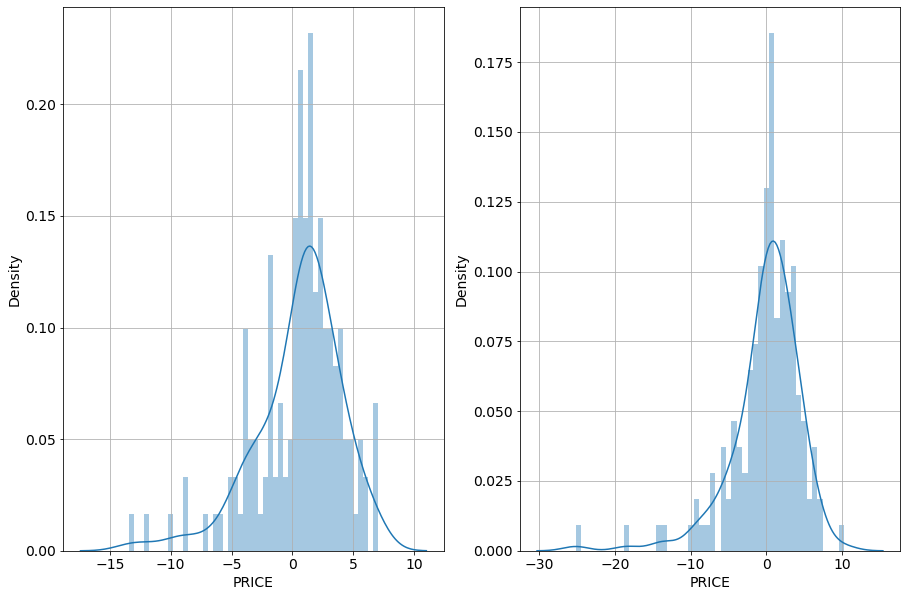

In [33]:
# Обучаем на выборке для обучения
reg.fit(X_train_scaled, y_train2)
y_pred2 = reg.predict(X_test_scaled)
y_residuals = y_pred2-y_test2
plt.subplot(121)
sns.distplot(y_residuals, bins=50)
plt.grid()

reg.fit(X_train, y_train)
y_pred1 = reg.predict(X_test)
y_residuals1 = y_pred1-y_test
plt.subplot(122)
sns.distplot(y_residuals1, bins=50)
plt.grid()

Без обработки

In [34]:
reg.fit(X_train, y_train)
show_linear_model_weights(reg, X_train.columns)
evaluate_regressor(reg, X_train, y_train, 'train')
evaluate_regressor(reg, X_test, y_test, 'test')


----- Weights -----
CRIM | -0.1334701028529461
ZN | 0.03580891359323195
INDUS | 0.04952264522005543
CHAS | 3.119835116285394
NOX | -15.417060895306689
RM | 4.057199231645403
AGE | -0.010820835184926221
DIS | -1.3859982431608788
RAD | 0.24272733982224926
TAX | -0.00870223436566183
PTRATIO | -0.9106852081102881
B | 0.011794115892575632
LSTAT | -0.5471133128239569
Bias: 31.631084035691632

----- Evaluation for train -----
  R2: 0.7434997532004697
  RMSE: 4.748208239685937
  MAE: 3.356826782168207

----- Evaluation for test -----
  R2: 0.7112260057484874
  RMSE: 4.638689926172867
  MAE: 3.1627098714574537


После обработки

In [35]:
reg.fit(X_train_scaled, y_train2)
show_linear_model_weights(reg, X_train.columns)
evaluate_regressor(reg, X_train_scaled, y_train2, 'train')
evaluate_regressor(reg, X_test_scaled, y_test2, 'test')


----- Weights -----
CRIM | -0.12381878117351394
ZN | 0.04038991169297008
INDUS | -0.04633642800193789
CHAS | -0.029973239830924307
NOX | -14.688063333672863
RM | 3.333246719403874
AGE | -0.021294868200934354
DIS | -1.3881850773173994
RAD | 0.23160877762484414
TAX | -0.012433320325953387
PTRATIO | -0.8576286263011887
B | 0.006898412474272638
LSTAT | -0.3753130106657583
Bias: 37.5599334261054

----- Evaluation for train -----
  R2: 0.7798306337503477
  RMSE: 3.778282589754244
  MAE: 2.7961504147140688

----- Evaluation for test -----
  R2: 0.7538446825846039
  RMSE: 3.5951405792699194
  MAE: 2.7775138468973313


Показатели улучшились.

#Исключение признаков по очереди

В записях показан исключенный признак.

In [94]:
df3=df
df3.columns[0]
df4= pd.DataFrame(columns=['R2','RNSE','MAE'])

for i in range(0,13):
  df3=df
  #исключаем столбец
  df3=df3.drop(columns=df3.columns[i])
  #print(df3)
  X = df3[df3.columns[0:11]]
  y = df3['PRICE']
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_RATIO,  random_state=RANDOM_STATE)
  reg.fit(X_train, y_train)
  y_pred = reg.predict(X)
  a1 = r2_score(y, y_pred)
  a2 = np.sqrt(mean_squared_error(y, y_pred))
  a3 = mean_absolute_error(y, y_pred)
  df5=pd.DataFrame({'R2':[a1],'RNSE':[a2],'MAE':[a3]},index=[df.columns[i]])
  df4=df4.append(df5)
  
print(df4)

               R2      RNSE       MAE
CRIM     0.668090  5.293362  3.472100
ZN       0.676506  5.225823  3.465216
INDUS    0.680660  5.192160  3.447010
CHAS     0.673194  5.252505  3.439419
NOX      0.665227  5.316142  3.417474
RM       0.519792  6.367021  4.628646
AGE      0.673189  5.252549  3.558198
DIS      0.648043  5.450876  3.584698
RAD      0.671234  5.268233  3.477684
TAX      0.675438  5.234444  3.477391
PTRATIO  0.648347  5.448523  3.649829
B        0.666943  5.302501  3.553183
LSTAT    0.666943  5.302501  3.553183


Самое большое влияние на результат оказывает признак RM.

#PolynomialFeatures



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


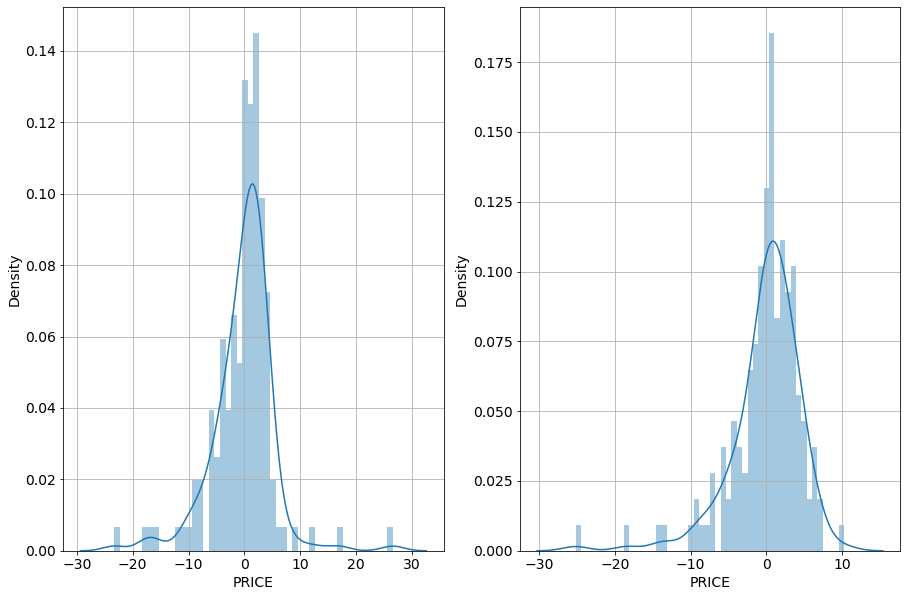

In [111]:
from sklearn.preprocessing import PolynomialFeatures

LSTAT = PolynomialFeatures(2)

X = df[feature_names]
y = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_RATIO,  random_state=RANDOM_STATE)
 
X_train_scaled=LSTAT.fit_transform(X_train)
X_test_scaled = LSTAT.fit_transform(X_test)


# Обучаем на выборке для обучения
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
y_residuals = y_pred-y_test
plt.subplot(121)
sns.distplot(y_residuals, bins=50)
plt.grid()

reg.fit(X_train, y_train)
y_pred1 = reg.predict(X_test)
y_residuals1 = y_pred1-y_test
plt.subplot(122)
sns.distplot(y_residuals1, bins=50)
plt.grid()

Без обработки

In [114]:
reg.fit(X_train, y_train)

evaluate_regressor(reg, X_train, y_train, 'train')
evaluate_regressor(reg, X_test, y_test, 'test')


----- Evaluation for train -----
  R2: 0.7434997532004697
  RMSE: 4.748208239685937
  MAE: 3.356826782168207

----- Evaluation for test -----
  R2: 0.7112260057484874
  RMSE: 4.638689926172867
  MAE: 3.1627098714574537


После обработки

In [115]:
reg.fit(X_train_scaled, y_train)

evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')


----- Evaluation for train -----
  R2: 0.9042977589841923
  RMSE: 2.900326678565267
  MAE: 2.258394657555273

----- Evaluation for test -----
  R2: 0.5999778574278731
  RMSE: 5.459568493822549
  MAE: 3.6066854476928714


Показатели ухудшились.

#Ридж (Ridge)

StandardScaler()

0.7108071617209415
0.7103910188948884
0.7099793776727346
0.7095734391093101
0.7091739725552978
0.7087814358380775
0.7083960620730545


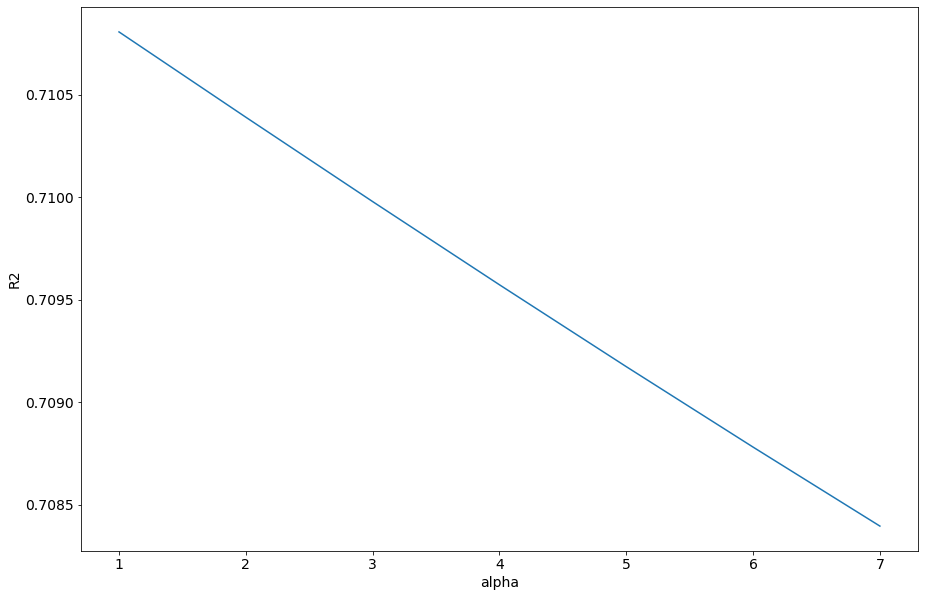

In [144]:
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import Ridge

scaler = StandardScaler()

r2=np.array([])
x=np.array([])
for i in range(1,8):
  reg = Ridge(alpha=i)
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  reg.fit(X_train_scaled, y_train)

  X = df[df.columns]
  y = df['PRICE']
  y_pred = reg.predict(X_test_scaled)
  a1 = r2_score(y_test, y_pred)
  r2= np.append(r2,[a1])
  x=np.append(x,i)
  print(a1)

plt.xlabel('alpha')
plt.ylabel('R2')
plt.plot(x,r2)





0.711020981158772
0.7043212168932313
0.6957485583945475
0.6864589903733649
0.6769370619920476
0.667435109905783
0.6580952264530635


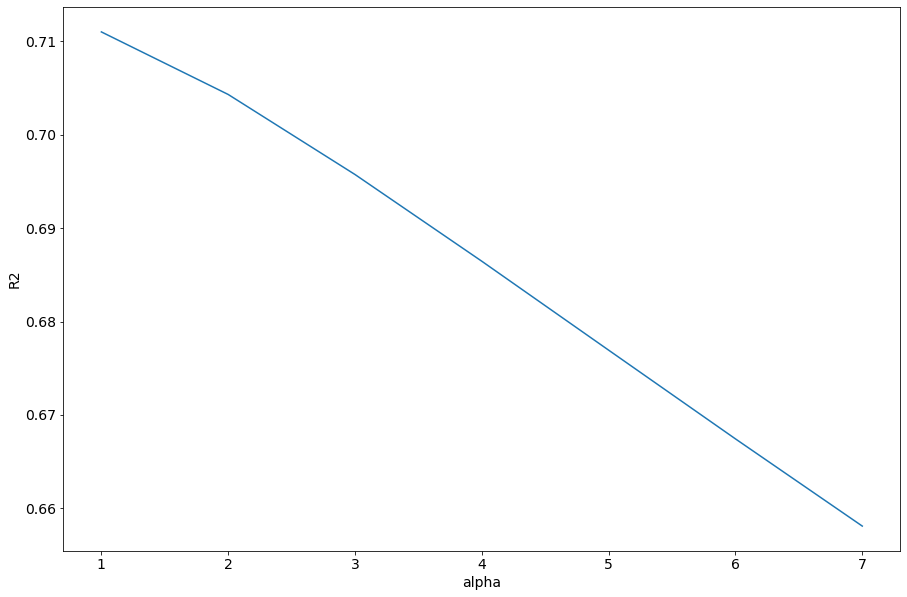

In [145]:
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import Ridge

scaler = MinMaxScaler()

r2=np.array([])
x=np.array([])
for i in range(1,8):
  reg = Ridge(alpha=i)
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  reg.fit(X_train_scaled, y_train)

  X = df[df.columns]
  y = df['PRICE']
  y_pred = reg.predict(X_test_scaled)
  a1 = r2_score(y_test, y_pred)
  r2= np.append(r2,[a1])
  x=np.append(x,i)
  print(a1)

plt.xlabel('alpha')
plt.ylabel('R2')
plt.plot(x,r2)





/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


0.740795451130297
0.7403660093033266
0.7399356689364491
0.7395050150717937
0.7390745204696578
0.7386445662807843
0.7382154587157663


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


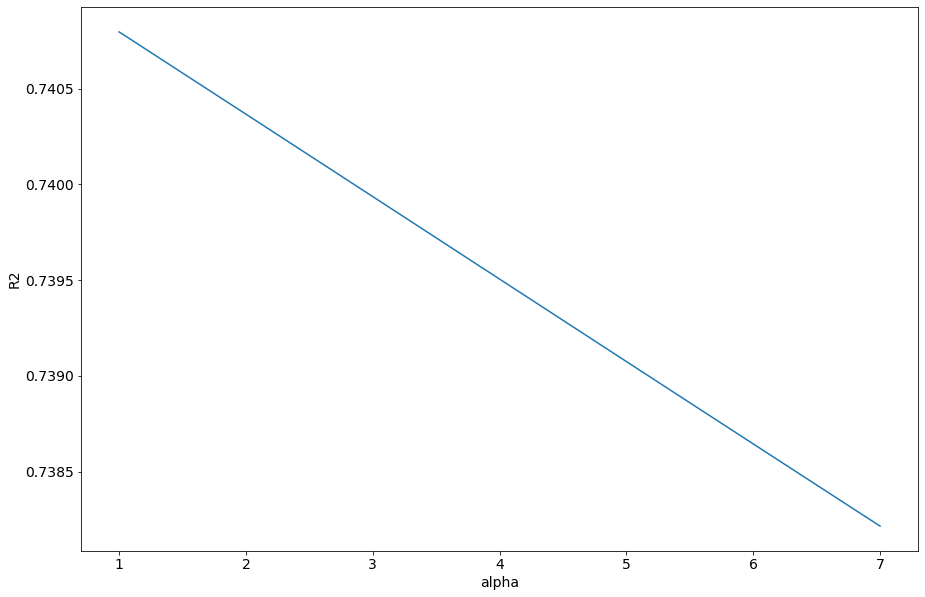

In [146]:
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import Ridge

scaler = PowerTransformer()

r2=np.array([])
x=np.array([])
for i in range(1,8):
  reg = Ridge(alpha=i)
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  reg.fit(X_train_scaled, y_train)

  X = df[df.columns]
  y = df['PRICE']
  y_pred = reg.predict(X_test_scaled)
  a1 = r2_score(y_test, y_pred)
  r2= np.append(r2,[a1])
  x=np.append(x,i)
  print(a1)

plt.xlabel('alpha')
plt.ylabel('R2')
plt.plot(x,r2)





/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (354). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (354). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (354). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (354). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_q

0.7464912158226579
0.7464895520891072
0.7464676541724692
0.7464265093555195
0.7463670510624395
0.7462901622624276
0.7461966786261864


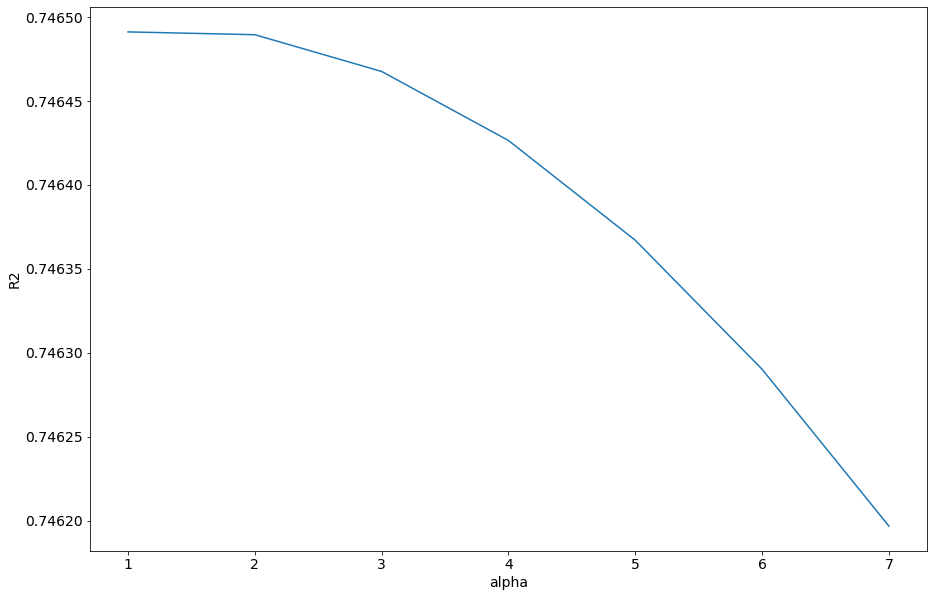

In [147]:
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import Ridge

scaler = QuantileTransformer(output_distribution='normal')

r2=np.array([])
x=np.array([])
for i in range(1,8):
  reg = Ridge(alpha=i)
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  reg.fit(X_train_scaled, y_train)

  X = df[df.columns]
  y = df['PRICE']
  y_pred = reg.predict(X_test_scaled)
  a1 = r2_score(y_test, y_pred)
  r2= np.append(r2,[a1])
  x=np.append(x,i)
  print(a1)

plt.xlabel('alpha')
plt.ylabel('R2')
plt.plot(x,r2)





Лучшие показатели у QuantileTransformer. При увеличении альфа показатели ухудшаются.

#Выводы
Лучшие по итогу всех исследований результаты при QuantileTransformer и Ridge модели, а также при исключении выбросов.